# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [3]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
72,CAROLINE,0,212706,73,F
178,ELIZANGELA,0,88505,179,F
41,DANIELA,0,302915,42,F
104,EVA,0,160617,105,F
63,ERICA,0,231088,64,F


In [4]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
142,HUGO,0,100685,143,M
125,VALMIR,0,115978,126,M
111,CLEITON,0,128738,112,M
167,ANGELO,0,78108,168,M
195,WALTER,0,67207,196,M


In [5]:
print('Quantidade de nomes : ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes : 400


In [6]:
frames = [nomes_f, nomes_m]

In [7]:
nomes = pd.concat(frames)['nome'].to_frame()

In [8]:
nomes.sample(5)

,nome
71,MARTA
179,IAGO
98,GILSON
26,GUSTAVO
172,REBECA


# Incluindo ID dos alunos

In [9]:
import numpy as np
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [13]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [15]:
!pip3 install html5lib
!pip3 install lxml

In [16]:
import html5lib

In [17]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [18]:
type(cursos)

list

In [19]:
cursos = cursos[0]

In [20]:
type(cursos)

pandas.core.frame.DataFrame

In [21]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [22]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})


In [23]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [27]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [28]:
nomes['matriculas'] = np.random.exponential(size = total_alunos).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,0
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,0
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,0
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,0
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,0


In [29]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br,2
89,JEAN,89,@dominiodoemail.com.br,jean@dominiodoemail.com.br,1
17,LUCIANA,163,@dominiodoemail.com.br,luciana@dominiodoemail.com.br,2
108,VILMA,31,@servicodoemail.com,vilma@servicodoemail.com,2
164,MARISA,105,@servicodoemail.com,marisa@servicodoemail.com,1


In [30]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
94,JAIR,344,@dominiodoemail.com.br,jair@dominiodoemail.com.br,2
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
134,ALBERTO,245,@dominiodoemail.com.br,alberto@dominiodoemail.com.br,3
88,GILMAR,142,@servicodoemail.com,gilmar@servicodoemail.com,2
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,1


In [31]:
nomes.matriculas.describe()

count    400.000000
mean       2.100000
std        1.464706
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: matriculas, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


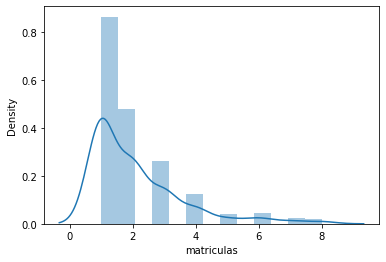

In [32]:
import seaborn as sns
sns.distplot(nomes.matriculas)

In [33]:
nomes.matriculas.value_counts()

1    186
2    103
3     56
4     27
6     10
5      9
7      5
8      4
Name: matriculas, dtype: int64

In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
186,INES,319,@servicodoemail.com,ines@servicodoemail.com,1
65,MAURICIO,395,@servicodoemail.com,mauricio@servicodoemail.com,1
161,RAIANE,247,@servicodoemail.com,raiane@servicodoemail.com,1
64,VIVIANE,396,@servicodoemail.com,viviane@servicodoemail.com,5
22,VITORIA,80,@servicodoemail.com,vitoria@servicodoemail.com,1


# Selecionando cursos

In [35]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
67,HENRIQUE,64,@dominiodoemail.com.br,henrique@dominiodoemail.com.br,7
17,LUCIANA,163,@dominiodoemail.com.br,luciana@dominiodoemail.com.br,1
177,CLAUDINEI,254,@servicodoemail.com,claudinei@servicodoemail.com,3


In [36]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [37]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range (matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,14
2,43,2
3,304,5
4,304,1


In [69]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'}, inplace = True)

In [70]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
66,DANILO,348,@dominiodoemail.com.br,danilo@dominiodoemail.com.br,2
72,GILBERTO,252,@dominiodoemail.com.br,gilberto@dominiodoemail.com.br,1
72,CAROLINE,232,@servicodoemail.com,caroline@servicodoemail.com,3
111,CLEITON,223,@dominiodoemail.com.br,cleiton@dominiodoemail.com.br,4
80,TAIS,179,@dominiodoemail.com.br,tais@dominiodoemail.com.br,3


In [71]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [72]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,14
2,43,2
3,304,5
4,304,1


In [73]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,30,Lógica de programação
2,62,Java para Web
3,24,C# para Web
4,7,Ruby on Rails
5,77,Cursos de Python


# Saída em diferentes formatos

In [56]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [57]:
pd.read_csv('matriculas_por_curso.csv')

,id_aluno,nome_do_curso
0,30,Lógica de programação
1,62,Java para Web
2,24,C# para Web
3,7,Ruby on Rails
4,77,Cursos de Python
5,21,PHP com MySql
6,33,.NET para web
7,43,Novas integrações com Java
8,26,TDD com Java
9,20,Código limpo com C#


In [58]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"id_aluno":{"1":30,"2":62,"3":24,"4":7,"5":77,"6":21,"7":33,"8":43,"9":26,"10":20,"11":28,"12":49,"13":17,"14":62,"15":83,"16":24,"17":36,"18":71,"19":70,"20":57},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [59]:
type(matriculas_json)

str

In [60]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id_aluno</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>30</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>62</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>24</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>7</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>77</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>21</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>33</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>43</td>\n      <td>Novas integrações com Java</td>\n    </tr>\n  

In [61]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id_aluno</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>30</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>62</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>24</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>77</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>21</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>33</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>43</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>26</td>
      <td>TDD

# Criando o banco sql

In [48]:

!pip install sqlalchemy

In [80]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [82]:
engine = create_engine('sqlite:///:memory:')

In [81]:
engine

Engine(sqlite:///:memory:)

In [51]:
type(engine)

sqlalchemy.engine.base.Engine

In [83]:
matriculas_por_curso.to_sql('matriculas', engine)

In [84]:
inspector = inspect(engine)

In [85]:
print(inspector.get_table_names())

['matriculas']


# Buscando do banco sql

In [77]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [86]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,7,Ruby on Rails
1,13,17,Persistência com .NET


In [87]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,30
1,Java para Web,62
2,C# para Web,24
3,Ruby on Rails,7
4,Cursos de Python,77
5,PHP com MySql,21
6,.NET para web,33
7,Novas integrações com Java,43
8,TDD com Java,26
9,Código limpo com C#,20


In [102]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [103]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,30
1,Java para Web,62
2,C# para Web,24
3,Ruby on Rails,7
4,Cursos de Python,77
5,PHP com MySql,21
6,.NET para web,33
7,Novas integrações com Java,43
8,TDD com Java,26
9,Código limpo com C#,20


In [147]:
muitas_matriculas_90 = muitas_matriculas.query('quantidade_de_alunos > 90')

In [148]:
muitas_matriculas_90

,nome_do_curso,quantidade_de_alunos


# Escrevendo no banco

In [149]:
muitas_matriculas_90.to_sql('muitas_matriculas_90', con = engine)

In [150]:
print(inspector.get_table_names())

['matriculas']


# Nomes dos alunos e alunas da próxima turma

In [127]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,30,Lógica de programação
2,62,Java para Web
3,24,C# para Web
4,7,Ruby on Rails
5,77,Cursos de Python
6,21,PHP com MySql
7,33,.NET para web
8,43,Novas integrações com Java
9,26,TDD com Java


In [128]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,14
2,43,2
3,304,5
4,304,1
...,...,...
835,99,2
836,323,15
837,383,7
838,383,8


In [129]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
18,310,16
169,246,16
224,31,16
249,178,16
258,20,16
261,30,16
263,79,16
300,301,16
314,160,16
342,128,16


In [130]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br,3
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,6


In [131]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
9,16,RENAN,@dominiodoemail.com.br,renan@dominiodoemail.com.br,4
20,16,BENEDITA,@dominiodoemail.com.br,benedita@dominiodoemail.com.br,2
30,16,SEBASTIANA,@dominiodoemail.com.br,sebastiana@dominiodoemail.com.br,3
31,16,VILMA,@servicodoemail.com,vilma@servicodoemail.com,4
51,16,MANUEL,@dominiodoemail.com.br,manuel@dominiodoemail.com.br,3
66,16,LUAN,@dominiodoemail.com.br,luan@dominiodoemail.com.br,4
66,16,LUAN,@dominiodoemail.com.br,luan@dominiodoemail.com.br,4
70,16,RAIMUNDO,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br,1
79,16,TAINA,@servicodoemail.com,taina@servicodoemail.com,6


In [132]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
9           RENAN
20       BENEDITA
30     SEBASTIANA
31          VILMA
51         MANUEL
66           LUAN
66           LUAN
70       RAIMUNDO
79          TAINA
113        FELIPE
128       TAINARA
130          RUAN
136         JAIRO
142        GILMAR
160          LARA
178       JOSIANE
196       ADRIANO
246         LAURA
264        TERESA
301        MAIARA
307        VALDIR
310       JULIANA
321      FERNANDO
345          IGOR
Name: nome, dtype: object

In [133]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
9,RENAN
20,BENEDITA
30,SEBASTIANA
31,VILMA
51,MANUEL
66,LUAN
66,LUAN
70,RAIMUNDO
79,TAINA


In [135]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [136]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [137]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
9,RENAN
20,BENEDITA
30,SEBASTIANA
31,VILMA
51,MANUEL
66,LUAN
66,LUAN
70,RAIMUNDO
79,TAINA


In [138]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {} '.format(nome_curso)})
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
301,MAIARA
128,TAINARA
345,IGOR
321,FERNANDO
79,TAINA


# Excel

In [139]:
proxima_turma.to_excel('proxima_turma.xlsx' , index = False)

In [140]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,RENAN
1,BENEDITA
2,SEBASTIANA
3,VILMA
4,MANUEL
5,LUAN
6,LUAN
7,RAIMUNDO
8,TAINA
9,FELIPE
